In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 1000).T

In [40]:
df = pd.DataFrame()

In [41]:
df['exp(in months)']=m[0]
df['salary(in thousands)']=m[1]

In [42]:
df.head()

,exp(in months),salary(in thousands)
0,24.063360,33.594233
1,28.899488,29.499530
2,14.784618,19.704482
3,26.155801,32.475784
4,31.184332,33.751772


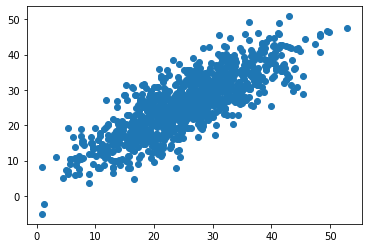

In [43]:
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])

In [53]:
X = df.iloc[:,0:1].values
y= df.iloc[:,1].values

In [54]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [56]:
print(X_train.shape)
print(X_test.shape)

(800, 1)
(200, 1)


In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [58]:
regressor.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred = regressor.predict(X_test)

In [60]:
# Finding the coefs and intercept

# Equation of  line is given by y=mx+b
# y= 0.21*x + 5.50
# m---> slope
# b--->intercept

# X coefficient
print(regressor.coef_[0])

# y intercept
print(regressor.intercept_)

0.7946565530719332
5.738301166290455


In [73]:
df_error=pd.DataFrame()
df_error['y_test']=y_test
df_error['y_pred']=y_pred
df_error.shape

(200, 2)

In [74]:
df_error

,y_test,y_pred
0,21.683961,23.445019
1,19.175776,23.177729
2,22.414473,26.919477
3,26.370672,31.132122
4,20.597865,20.125161
...,...,...
195,7.896083,14.280470
196,49.260156,34.491456
197,33.594233,24.860408
198,26.538632,30.992705


In [77]:
# Mean Absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

3.830693025290108

In [78]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

22.995550105876227

In [79]:
# Root Mean Squared Error
mse = mean_squared_error(y_test,y_pred)
np.sqrt(mse)

4.795367567337902

In [80]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7169502749885428

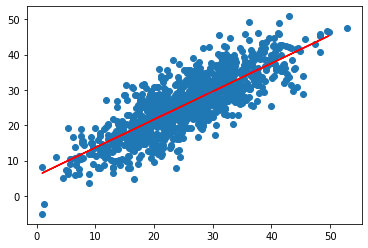

In [81]:
# Visualizing te regression line
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.scatter(df['exp(in months)'],df['salary(in thousands)'])